# Plongements lexicaux avec Gensim

In [7]:
import gensim
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

## Glove

Ici on utilise des vecteurs [Glove](https://nlp.stanford.edu/projects/glove/). Veuillez télécharger le modèle glove.6B.100d.vec.txt et le stocker dans un répertoire models.

In [8]:
print("Chargement des vecteurs glove...")
gmodel = KeyedVectors.load_word2vec_format('glove.6B.100d.txt')
## Modifiez le fichier en lui ajoutant en premiere ligne : 400000 100
## Cela correspond à la dimension du vocabulaire et des vecteurs


Chargement des vecteurs glove...


In [9]:
gmodel.most_similar('montreal')

[('toronto', 0.8846457600593567),
 ('ottawa', 0.7738425731658936),
 ('vancouver', 0.7592548131942749),
 ('calgary', 0.757209300994873),
 ('edmonton', 0.7557228803634644),
 ('winnipeg', 0.7414008378982544),
 ('philadelphia', 0.7321642637252808),
 ('pittsburgh', 0.7310366630554199),
 ('cleveland', 0.7243793606758118),
 ('boston', 0.7195841670036316)]

In [10]:
gmodel.most_similar('orange')

[('yellow', 0.7358632683753967),
 ('red', 0.7140780091285706),
 ('blue', 0.7118034958839417),
 ('green', 0.7111417651176453),
 ('pink', 0.677507221698761),
 ('purple', 0.6774231195449829),
 ('black', 0.6709616184234619),
 ('colored', 0.665260910987854),
 ('lemon', 0.6251963973045349),
 ('peach', 0.6168625354766846)]

In [11]:
gmodel.most_similar('apple')

[('microsoft', 0.7449405789375305),
 ('ibm', 0.6821643710136414),
 ('intel', 0.6778088212013245),
 ('software', 0.6775422692298889),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.6617538332939148),
 ('iphone', 0.6595611572265625),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579985618591)]

In [12]:
gmodel.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636883735657),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854068756104),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [13]:
result = gmodel.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [14]:
result = gmodel.most_similar(positive=['woman','doctor'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

nurse: 0.7735


In [15]:
#glove['engineer'] - glove['man'] + glove['woman']
result = gmodel.most_similar(positive=['engineer', 'woman'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

technician: 0.6620


# Effectuer des analogies

In [16]:
def analogy(model, x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [17]:
analogy(gmodel, 'canada', 'canadian', 'australia')

'australian'

In [18]:
analogy(gmodel, 'woman', 'young', 'man')

'younger'

In [23]:
analogy(gmodel, 'man', 'doctor', 'woman')

'nurse'

In [20]:
analogy(gmodel, 'france', 'paris', 'spain')

'madrid'

In [21]:
analogy( gmodel, 'good', 'fantastic', 'bad')

'terrible'

In [22]:
analogy(gmodel, 'tall', 'tallest', 'heavy')

'heaviest'

## Avec des échecs aussi :

In [24]:
analogy(gmodel, 'france', 'paris', 'morocco')

'cairo'

# Visualisation

In [25]:
def display_pca(model, words=None, sample=0):
         
    word_vectors = np.array([model[w] for w in words])
    d = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(d[:,0], d[:,1], edgecolors='k', c='g')
    for word, (x,y) in zip(words, d):
        plt.text(x+0.05, y+0.05, word)

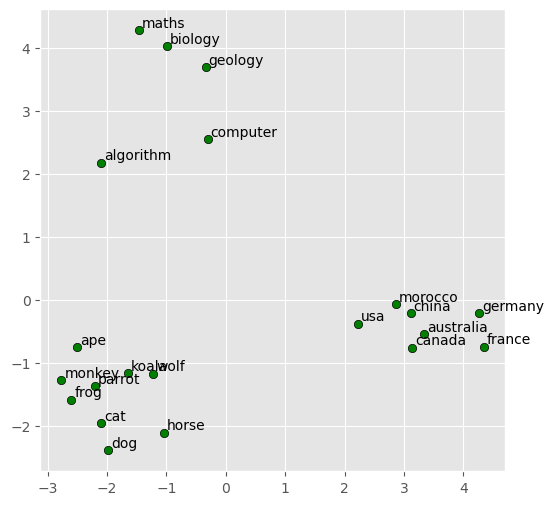

In [26]:
display_pca(gmodel, 
                        [  'morocco', 'france', 'canada', 'germany',  'australia', 'usa', 'china',
                         'dog', 'koala', 'frog',  'monkey', 'ape',  'wolf', 'horse', 'cat', 'parrot', 
                         'biology', 'geology', 'maths', 'computer', 'algorithm'])

## Autre façon pour charger des plongements: 

In [27]:
def load_embeddings(filename):
    """
    charger un DataFrame en utilisant un format général pour word2vec, GloVe,
    fastText
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')



In [33]:
embeddings = load_embeddings("glove.6B.100d.txt")
embeddings.shape

(400000, 100)

## Word2vec

Ici on utilise des vecteurs [Word2vec](https://code.google.com/archive/p/word2vec/)

In [34]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [35]:
vec_king = wv['king']
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [36]:
print(wv.most_similar(positive=['animal', 'dog'], topn=5))

[('dogs', 0.8076707720756531), ('animals', 0.7456293106079102), ('cat', 0.7454961538314819), ('pet', 0.7447283267974854), ('pit_bull', 0.7396777272224426)]


In [37]:
print(wv.doesnt_match(['valley', 'mountain', 'land', 'sea', 'cat']))

cat
